In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


In [7]:
df = pd.read_csv('Resources/diabetes.csv')
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.8125


In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1).fit(X_train, y_train)
print(f"Logistic Regression Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Logistic Regression Testing Data Score: {classifier.score(X_test, y_test)}")

Logistic Regression Training Data Score: 0.7708333333333334
Logistic Regression Testing Data Score: 0.7760416666666666


C:\Users\twozi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
predictions = classifier.predict(X_test)
print(f"First 10 predictions:   {predictions[:10]}")
print(f"First 10 actual labels: {y_test[:10].tolist()}")

First 10 predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [16]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[109,  14],
       [ 29,  40]], dtype=int64)

In [17]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")

Accuracy: 0.7760416666666666


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["low_risk","high_risk"]))

              precision    recall  f1-score   support

    low_risk       0.79      0.89      0.84       123
   high_risk       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1).fit(X_train, y_train)
print(f'Random Forest Classifier Training Score: {clf.score(X_train, y_train)}')
print(f'Random Forest Classifier Testing Score: {clf.score(X_test, y_test)}')

Random Forest Classifier Training Score: 1.0
Random Forest Classifier Testing Score: 0.8072916666666666


In [20]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["low_risk","high_risk"]))

              precision    recall  f1-score   support

    low_risk       0.82      0.89      0.86       123
   high_risk       0.78      0.65      0.71        69

    accuracy                           0.81       192
   macro avg       0.80      0.77      0.78       192
weighted avg       0.80      0.81      0.80       192



In [21]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
classifier.fit(X_train_scaled, y_train)
print(f"Scaled Logistic Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Scaled Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Scaled Logistic Training Data Score: 0.7743055555555556
Scaled Testing Data Score: 0.7760416666666666


In [23]:
predictions = classifier.predict(X_test_scaled)
print(f"First 10 predictions:   {predictions[:10]}")
print(f"First 10 actual labels: {y_test[:10].tolist()}")

First 10 predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [24]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[109,  14],
       [ 29,  40]], dtype=int64)

In [25]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")

Accuracy: 0.7760416666666666


In [26]:
# Calculate the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["low_risk","high_risk"]))

              precision    recall  f1-score   support

    low_risk       0.79      0.89      0.84       123
   high_risk       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



In [27]:
clfr = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
print(f'Scaled Random Forest Classifier Training Score: {clfr.score(X_train_scaled, y_train)}')
print(f'Scaled Random Forest Classifier Testing Score: {clfr.score(X_test_scaled, y_test)}')

Scaled Random Forest Classifier Training Score: 1.0
Scaled Random Forest Classifier Testing Score: 0.8125


In [28]:
# Fit a model, and then print a classification report
y_pred = clfr.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=["low_risk","high_risk"]))
print(f'Training Score: {clfr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clfr.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

    low_risk       0.83      0.89      0.86       123
   high_risk       0.78      0.67      0.72        69

    accuracy                           0.81       192
   macro avg       0.80      0.78      0.79       192
weighted avg       0.81      0.81      0.81       192

Training Score: 1.0
Testing Score: 0.8125


In [29]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")

Accuracy: 0.8125


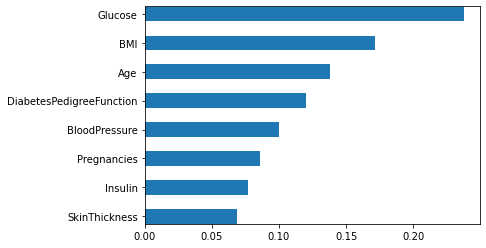

In [34]:
from matplotlib import pyplot as plt
feature_importances = clf.feature_importances_
features = sorted(zip(X_test.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

plt.margins(y=0.001)

ax.barh(y=cols, width=width, height=0.5)
plt.savefig("Images/img1.png")
plt.show()

In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [37]:
df_scaled.shape

(768, 9)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
scaled_pca = pca.fit_transform(df_scaled)

In [39]:
df_pca = pd.DataFrame(data = scaled_pca)
df_pca.head()

,0,1,2,3,4,5,6
0,-1.756947,-1.111743,0.208791,0.333705,-0.481708,0.433002,0.457659
1,1.507421,0.559406,-0.650628,0.229934,0.004888,0.119311,0.366468
2,-0.650822,-1.929576,2.007740,-0.026129,-0.234056,-0.674044,0.721475
3,1.587398,1.065075,-0.474442,-0.580654,0.297429,0.070897,0.344750
4,-2.483374,2.359563,2.925515,3.936611,-1.566350,0.200397,-0.815131


In [40]:
pca.explained_variance_ratio_


array([0.26138907, 0.19714578, 0.12446946, 0.09799499, 0.09384705,
       0.08165203, 0.05426927])

In [41]:
scaled_pca.shape

(768, 7)

In [42]:
pca = PCA(n_components=3)

X_scaled_pca = pca.fit_transform(df_scaled)

In [43]:
df_scaled_pca = pd.DataFrame(
    data=X_scaled_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
df_scaled_pca.head()

,principal component 1,principal component 2,principal component 3
0,-1.756947,-1.111743,0.208791
1,1.507421,0.559406,-0.650628
2,-0.650822,-1.929576,2.007740
3,1.587398,1.065075,-0.474442
4,-2.483374,2.359563,2.925515


In [44]:
pca.explained_variance_ratio_

array([0.26138907, 0.19714578, 0.12446946])

In [45]:
# Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.
from sklearn.manifold import TSNE

# Run t-SNE
tsne = TSNE(learning_rate = 250)
tsne_features = tsne.fit_transform(df_scaled_pca)
tsne_features.shape

(768, 2)

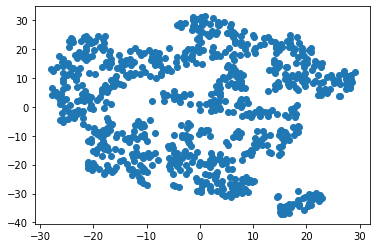

In [46]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.savefig("Images/img2.png")
plt.show()

In [47]:
from sklearn.cluster import KMeans
# Create an elbow plot to identify the best number of clusters
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_scaled_pca)
    inertia.append(km.inertia_)\
    
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\twozi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,4029.725759
1,2,2803.074570
2,3,2082.114109
3,4,1701.815090
4,5,1467.125213
5,6,1277.064546
6,7,1147.019375
7,8,1040.644557
8,9,962.760592
9,10,895.004102


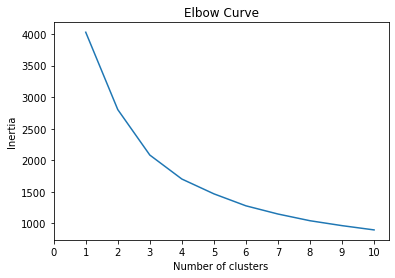

In [49]:
# Plot
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig("Images/img3.png")
plt.show()

In [50]:
import tensorflow as tf


In [51]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [53]:
df.nunique()


Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [54]:
count = df['BloodPressure'].value_counts()
print(count)

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64


In [55]:
types_to_replace = df['BloodPressure'].value_counts().index[30:]

# Replace in dataframe
for app in types_to_replace:
    df['BloodPressure'] = df['BloodPressure'].replace(app,"Other")

# Check to make sure binning was successful
df['BloodPressure'].value_counts()

70       57
74       52
68       45
78       45
72       44
64       43
80       40
76       39
60       37
0        35
62       34
66       30
Other    30
82       30
88       25
84       23
90       22
86       21
58       21
50       13
56       12
54       11
52       11
75        8
92        8
65        7
85        6
94        6
48        5
44        4
96        4
Name: BloodPressure, dtype: int64

In [56]:
count = df['Age'].value_counts()
print(count)

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64


In [57]:
age_to_replace = df['Age'].value_counts().index[25:]

# Replace in dataframe
for app in age_to_replace:
    df['Age'] = df['Age'].replace(app,"Other")

# Check to make sure binning was successful
df['Age'].value_counts()

Other    113
22        72
21        63
25        48
24        46
23        38
28        35
26        33
27        32
29        29
31        24
41        22
30        21
37        19
42        18
33        17
36        16
32        16
38        16
45        15
34        14
40        13
46        13
43        13
39        12
35        10
Name: Age, dtype: int64

In [58]:
count = df['BMI'].value_counts()
print(count)

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64


In [59]:
bmi_to_replace = df['BMI'].value_counts().index[55:]

# Replace in dataframe
for app in age_to_replace:
    df['BMI'] = df['BMI'].replace(app,"Other")

# Check to make sure binning was successful
df['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
45.2     1
36.7     1
41.8     1
42.6     1
46.3     1
Name: BMI, Length: 246, dtype: int64

In [60]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric = pd.get_dummies(df)
numeric

,Pregnancies,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,BloodPressure_0,BloodPressure_44,BloodPressure_48,BloodPressure_50,...,Age_37,Age_38,Age_39,Age_40,Age_41,Age_42,Age_43,Age_45,Age_46,Age_Other
0,6,148,35,0,0.627,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,85,29,0,0.351,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,183,0,0,0.672,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,89,23,94,0.167,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,137,35,168,2.288,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,48,180,0.171,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
764,2,122,27,0,0.340,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
765,5,121,23,112,0.245,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
766,1,126,0,0,0.349,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
# Split our preprocessed data into our features and target arrays
X = numeric.drop(['Outcome'], axis='columns').values
y = numeric['Outcome'].values 

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [62]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [63]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = 120, input_dim=number_input_features, activation = 'relu'))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units = 30, activation = 'sigmoid'))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               37080     
                                                                 
 dense_1 (Dense)             (None, 30)                3630      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 40,741
Trainable params: 40,741
Non-trainable params: 0
_________________________________________________________________


In [64]:
import os
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimized2/",exist_ok=True)
checkpoint_dir = "checkpoints_optimized2/weights.{epoch:02d}.hdf5"

In [65]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [66]:
from keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a callback that saves the model's weights every 5 epochs
checkpoint = ModelCheckpoint(filepath = checkpoint_dir, monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=5)

# Train the model
fit = nn.fit(X_train_scaled,y_train, epochs=15, callbacks=[checkpoint])

Epoch 1/15
18/18 [==============================] - 0s 997us/step - loss: 0.6579 - accuracy: 0.6007
Epoch 2/15
18/18 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.6667
Epoch 3/15
18/18 [==============================] - 0s 939us/step - loss: 0.5024 - accuracy: 0.7795
Epoch 4/15
18/18 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.8576
Epoch 5/15
 1/18 [>.............................] - ETA: 0s - loss: 0.3417 - accuracy: 0.9375
Epoch 5: loss improved from inf to 0.35222, saving model to checkpoints_optimized2\weights.05.hdf5
18/18 [==============================] - 0s 3ms/step - loss: 0.3522 - accuracy: 0.8958
Epoch 6/15
18/18 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.9184
Epoch 7/15
18/18 [==============================] - 0s 1ms/step - loss: 0.2359 - accuracy: 0.9410
Epoch 8/15
18/18 [==============================] - 0s 1ms/step - loss: 0.1948 - accuracy: 0.9514
Epoch 9/15
18/18 [============

In [67]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - loss: 1.0291 - accuracy: 0.6250 - 147ms/epoch - 25ms/step
Loss: 1.029056191444397, Accuracy: 0.625
